# Generate Random Coordinates
___

This notebook will go through the generation of skypositions.
___

Implemented as `utils.generate_coordinates()`

In [1]:
from __future__ import print_function

try:
    from importlib import reload
except:
    pass

%matplotlib inline

from matplotlib import pyplot as plt

import os
import warnings

import numpy as np
import pandas as pd
import astropy as ap

from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
# %%timeit # 100 loops, best of 3: 4.12 ms per loop
# nruns = 10000000
nruns = 100000

"""With help from CFro"""
low_ra = 0.
high_ra = 360.

low_dec = -90.
high_dec = 10

umin=np.radians(low_ra)/(2.*np.pi)
umax=np.radians(high_ra)/(2.*np.pi)

vmin=(np.cos(np.radians(90.+low_dec))+1.0)/2.
vmax=(np.cos(np.radians(90.+high_dec))+1.0)/2.

# pDec=np.random.uniform(vmin, vmax, size = nruns)
# pRa=np.random.uniform(umin, umax, size = nruns)
    
df = pd.DataFrame({"theta" : (2. * np.pi * (np.random.uniform(umin, umax, size = nruns) - 0.5)),
                  "phi" : (np.arccos(2. * np.random.uniform(vmin, vmax, size = nruns) - 1.) - np.pi/2.)})

In [3]:
df

,phi,theta
0,-0.190321,-2.556548
1,-0.189133,-0.399059
2,-1.261211,-1.120124
3,-0.572139,-0.014211
4,-0.673339,1.935713
5,-1.207369,0.647861
6,-0.976984,-2.099055
7,-0.428963,0.703765
8,-0.574573,2.542344
9,-0.577710,0.966782


In [4]:
# plt.hist(pRa)
# plt.hist(pDec)

In [5]:

# %%timeit 
# df["coords"] = SkyCoord(df["theta"], df["phi"], unit = u.radian )

In [6]:
hist, xedges, yedges = np.histogram2d(df["theta"], df["phi"], bins = 100)
X, Y = np.meshgrid(xedges, yedges)

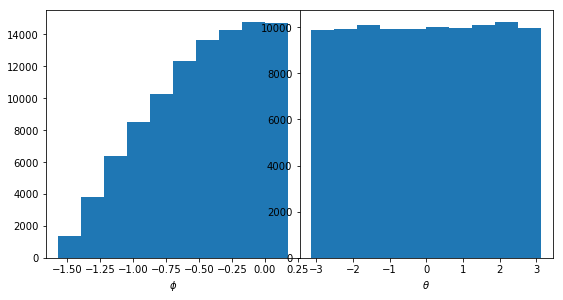

In [7]:
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.97, hspace=0, wspace = 0)
# ax = fig.add_subplot(111, projection="aitoff")
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

hist_phi = ax1.hist(df["phi"])
hist_theta = ax2.hist(df["theta"])

ax1.set_xlabel(r"$\phi$")
ax2.set_xlabel(r"$\theta$")

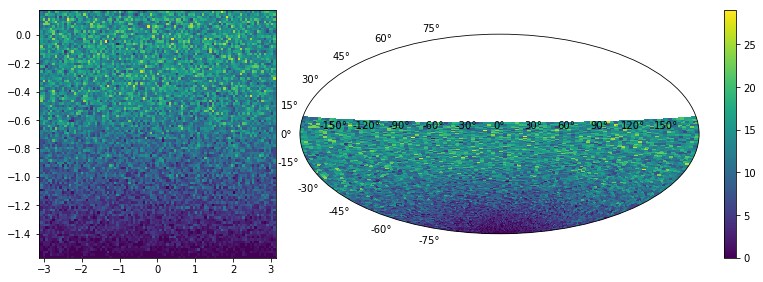

In [8]:
fig = plt.figure(figsize=[12, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.97, hspace=0, wspace = .1)

    
ax_flat = plt.subplot2grid((1,3), (0,0), colspan = 1, rowspan = 1)
ax_aitoff = plt.subplot2grid((1,3), (0,1), colspan = 2, rowspan = 1, projection="aitoff")

im_flat = ax_flat.pcolormesh(X, Y, hist.T)
im_aitoff = ax_aitoff.pcolormesh(X, Y, hist.T)


fig.colorbar(im_aitoff, ax=ax_aitoff)